In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_json("../data_processing/processed_files/books_processed.jsonl", lines=True)

In [18]:
df

,title,price,category,stock_count,rating,description
0,A Light in the Attic,51.77,Poetry,22,3,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,53.74,Historical Fiction,20,1,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.10,Fiction,20,1,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,47.82,Mystery,20,4,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.23,History,20,5,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...
995,Alice in Wonderland,55.53,Classics,1,1,
996,"Ajin: Demi-Human, Volume 1",57.06,Sequential Art,1,4,High school student Kei Nagai is struck dead i...
997,A Spy's Devotion,16.97,Historical Fiction,1,5,"In England’s Regency era, manners and elegance..."
998,1st to Die,53.98,Mystery,1,1,"James Patterson, bestselling author of the Ale..."


# Prepare the data for training (features and target)

In [19]:
X = df[['rating']]  # Features (rating)
y = df['price']  # Target (Price)

In [20]:
X

,rating
0,3
1,1
2,1
3,4
4,5
...,...
995,1
996,4
997,5
998,1


# Split the data into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model

In [22]:
model = LinearRegression()
# train
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the test set

In [23]:
train_pred = model.predict(X_train)
train_pred

array([36.3348092 , 35.0808981 , 34.66292773, 35.91683883, 35.0808981 ,
       35.91683883, 36.3348092 , 35.91683883, 36.3348092 , 35.0808981 ,
       35.91683883, 35.0808981 , 35.91683883, 35.0808981 , 35.0808981 ,
       34.66292773, 35.0808981 , 34.66292773, 35.49886847, 34.66292773,
       35.49886847, 35.91683883, 36.3348092 , 34.66292773, 34.66292773,
       35.49886847, 36.3348092 , 35.49886847, 34.66292773, 34.66292773,
       35.0808981 , 36.3348092 , 35.91683883, 35.0808981 , 35.49886847,
       36.3348092 , 35.0808981 , 35.49886847, 36.3348092 , 34.66292773,
       35.91683883, 34.66292773, 36.3348092 , 35.91683883, 35.49886847,
       36.3348092 , 34.66292773, 36.3348092 , 35.0808981 , 35.49886847,
       34.66292773, 35.49886847, 35.91683883, 35.49886847, 35.91683883,
       35.49886847, 34.66292773, 34.66292773, 35.91683883, 34.66292773,
       35.0808981 , 35.91683883, 35.91683883, 35.49886847, 35.49886847,
       36.3348092 , 35.0808981 , 36.3348092 , 35.91683883, 36.33

In [24]:
test_pred = model.predict(X_test)
test_pred

array([36.3348092 , 34.66292773, 35.49886847, 36.3348092 , 35.49886847,
       34.66292773, 34.66292773, 35.0808981 , 35.0808981 , 34.66292773,
       35.0808981 , 35.49886847, 36.3348092 , 36.3348092 , 35.49886847,
       34.66292773, 34.66292773, 36.3348092 , 34.66292773, 35.49886847,
       35.91683883, 36.3348092 , 34.66292773, 36.3348092 , 35.91683883,
       35.91683883, 35.0808981 , 35.91683883, 35.91683883, 34.66292773,
       35.0808981 , 35.91683883, 36.3348092 , 35.91683883, 35.91683883,
       35.49886847, 35.49886847, 35.91683883, 35.91683883, 35.49886847,
       35.49886847, 34.66292773, 35.0808981 , 35.91683883, 35.49886847,
       36.3348092 , 35.91683883, 36.3348092 , 34.66292773, 36.3348092 ,
       35.0808981 , 34.66292773, 36.3348092 , 35.49886847, 36.3348092 ,
       36.3348092 , 35.49886847, 35.0808981 , 35.0808981 , 34.66292773,
       35.91683883, 36.3348092 , 35.0808981 , 35.0808981 , 35.49886847,
       34.66292773, 36.3348092 , 35.49886847, 35.49886847, 36.33

# Evaluate the model (using Mean Squared Error)

In [25]:
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
print(f"Mean Squared Error Train: {mse_train:.2f}")
print(f"Mean Squared Error Test: {mse_test:.2f}")

Mean Squared Error Train: 206.10
Mean Squared Error Test: 214.19


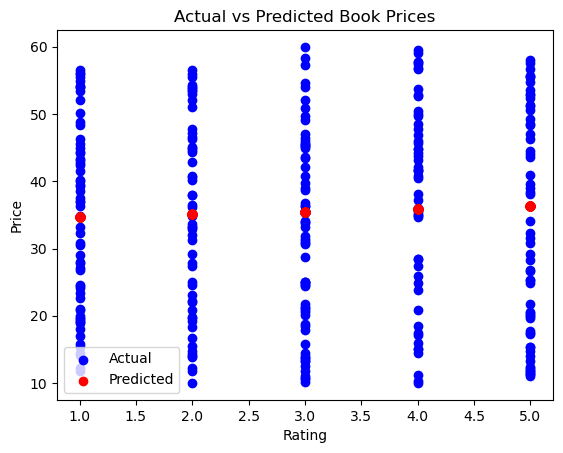

In [27]:
import matplotlib.pyplot as  plt
plt.scatter(X_test['rating'], y_test, color='blue', label='Actual')
plt.scatter(X_test['rating'], test_pred, color='red', label='Predicted')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Actual vs Predicted Book Prices')
plt.legend()
plt.show()


# Cloudy scatter plot -> Book rating not a reliable indicator of pricing